# Use spectra of CTIO Data in June 2017 to do atmospheric studies
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS 
- creation date   : June 9th 2017
- Big update : October 23th 2017

- version 1


In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *
init_notebook()

AnaAerCalibSpectrum
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_08jun17/HD205905


In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [5]:
from scipy.interpolate import interp1d

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
#%config InlineBackend.rc = {}
#matplotlib.rc_file("../../templates/matplotlibrc")

In [8]:
import pysynphot as S

# Initialisation

In [9]:
ShowInputSpectra=False

## Input fits file

In [10]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
date="20170608"
object_name='HD205905'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output

In [11]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./spectrum_anaaer"
ensure_dir(outputdir)

In [12]:
output_file='AnaAtmAerFromSpectra_'+object_name+'.csv'

# Read Input files

In [13]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [14]:
sorted_files[0:5]

array(['./simandcalibspec/calibandSimSpectra_20170608_155.fits',
       './simandcalibspec/calibandSimSpectra_20170608_159.fits',
       './simandcalibspec/calibandSimSpectra_20170608_160.fits',
       './simandcalibspec/calibandSimSpectra_20170608_161.fits',
       './simandcalibspec/calibandSimSpectra_20170608_162.fits'], 
      dtype='|S54')

In [15]:
all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

In [16]:
NDATA=len(all_rightspectra_data)
all_dt= [ parser.parse(all_dates[i]) for i in range(NDATA)]

# Clean spectra

In [17]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [18]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut
all_leftspectra_wl,all_leftspectra_data=all_leftspectra_wl_cut,all_leftspectra_data_cut
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

In [19]:
all_rightspectra_sim=all_sim_spectra_data
all_rightspectra_sim_wl=all_sim_spectra_wl

# Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


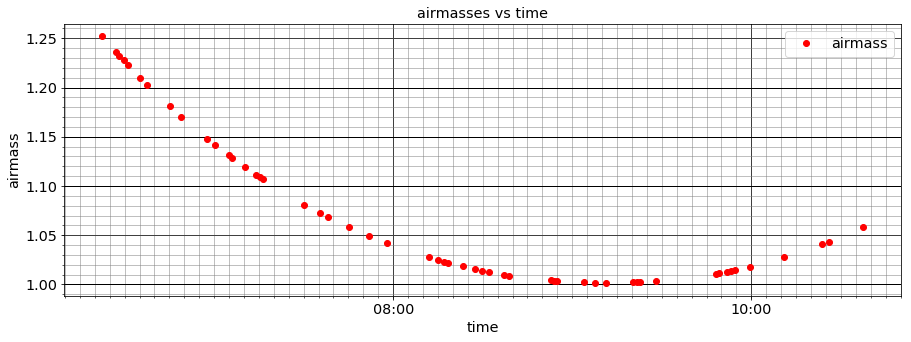

In [20]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

In [21]:
all_airmass=np.array(all_airmass)

# Sort Dispersers

In [22]:
print all_filt

['RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 Ron200', 'RG715 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhAg', 'FGB37 Thor300', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'FGB37 Ron200', 'FGB37 Thor300', 'RG715 Thor300', 'RG715 HoloPhAg', 'FGB37 Ron200', 'FGB37 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'FGB37 Ron200', 'RG715 Ron200', 'FGB37 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloPhP', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'RG715 Thor300', 'FGB37 Thor300', 'FGB37 Thor300', 'FGB37 HoloPhP', 'RG715 Thor300']


In [23]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [24]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

In [25]:
all_filt1=np.array(all_filt1)
all_filt2=np.array(all_filt2)

In [26]:
def FindIndexWithFilt(all_filt,in_index,tagfilt):
    all_filt_indisp=all_filt[in_index]
    sel_idx=np.where(all_filt_indisp==tagfilt)
    out_index=in_index[sel_idx]
    return out_index

In [27]:
all_filt1_Thor300=all_filt1[Thor300_index]
#all_filt1_Ron400=all_filt1[Ron400_index]
all_filt1_HoloPhP=all_filt1[HoloPhP_index]
all_filt1_HoloPhAg=all_filt1[HoloPhAg_index]
all_filt1_HoloAmAg=all_filt1[HoloAmAg_index]
all_filt1_Ron200=all_filt1[Ron200_index]

In [28]:
Thor300_index2=FindIndexWithFilt(all_filt1,Thor300_index,'FGB37')
#Ron400_index2=FindIndexWithFilt(all_filt1,Ron400_index,'FGB37')
HoloPhP_index2=FindIndexWithFilt(all_filt1,HoloPhP_index,'FGB37')
HoloPhAg_index2=FindIndexWithFilt(all_filt1,HoloPhAg_index,'FGB37')
HoloAmAg_index2=FindIndexWithFilt(all_filt1,HoloAmAg_index,'FGB37')
Ron200_index2=FindIndexWithFilt(all_filt1,Ron200_index,'FGB37')

# Show spectra

In [29]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

# True Bouguer line on data spectrum

In [30]:
print all_filt

['RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 Ron200', 'RG715 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhAg', 'FGB37 Thor300', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'FGB37 Ron200', 'FGB37 Thor300', 'RG715 Thor300', 'RG715 HoloPhAg', 'FGB37 Ron200', 'FGB37 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'FGB37 Ron200', 'RG715 Ron200', 'FGB37 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloPhP', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'RG715 Thor300', 'FGB37 Thor300', 'FGB37 Thor300', 'FGB37 HoloPhP', 'RG715 Thor300']


# Bouguer Lines

## View Bouguer Lines

###  Bouguer line for Data

Thor300


../../common_tools/common_notebook.py:7728: RuntimeWarning: invalid value encountered in log10
  all_log10S1 = 2.5*np.log10(all_S1)
../../common_tools/common_notebook.py:7729: RuntimeWarning: invalid value encountered in log10
  all_log10S2 = 2.5*np.log10(all_S2)
../../common_tools/common_notebook.py:7730: RuntimeWarning: invalid value encountered in log10
  all_log10S3 = 2.5*np.log10(all_S3)
../../common_tools/common_notebook.py:7731: RuntimeWarning: invalid value encountered in log10
  all_log10S4 = 2.5*np.log10(all_S4)


ValueError: On entry to DGELSD parameter number 6 had an illegal value

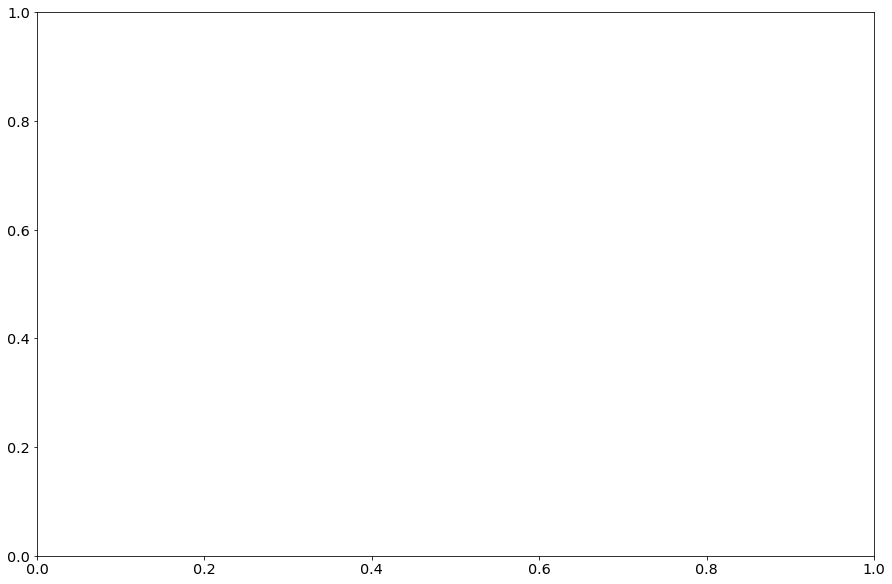

In [31]:
all_fitparamtruebouguer_data= []
all_popt_truebouguer_data=[]
all_perr_truebouguer_data= []
for dispname in Disp_names:
    if dispname != 'Ron400' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer,popt_truebouguer,perr_truebouguer = ShowTrueBouguerData(all_rightspectra_wl,all_rightspectra_data,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_data.append(fitparamtruebouguer)
        all_popt_truebouguer_data.append(popt_truebouguer)
        all_perr_truebouguer_data.append(perr_truebouguer)

### Bouguer line for simulation

In [ ]:
all_fitparamtruebouguer_sim= []
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer = ShowTrueBouguerSim(all_rightspectra_sim_wl,all_rightspectra_sim,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_sim.append(fitparamtruebouguer)

### Bouguer line for data and simulation

In [ ]:
all_fitparamtruebouguer_data2 = []
all_popt_truebouguer_data2 = []
all_perr_truebouguer_data2 = []
all_fitparamtruebouguer_sim2= []

for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer,popt_truebouguer,perr_truebouguer,fitparamtruebouguer_sim = ShowTrueBouguerDataSim(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_sim_wl,all_rightspectra_sim,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_data2.append(fitparamtruebouguer)
        all_popt_truebouguer_data2.append(popt_truebouguer)
        all_perr_truebouguer_data2.append(perr_truebouguer)
        all_fitparamtruebouguer_sim2.append(fitparamtruebouguer_sim)

## Get the slope value

In [ ]:
fitparamtruebouguer_sim

In [ ]:
truncpopt_truebouguer=np.trunc(np.array(popt_truebouguer)*10000)/10000
truncperr_truebouguer=np.trunc(np.array(perr_truebouguer)*10000)/10000
truncfitparam_sim=np.trunc(np.array(fitparamtruebouguer_sim)*10000)/10000

In [ ]:
table = ListTable()
table.append(["slope-data","error-data","slope-sim"])
for idd in range(0,6):
    table.append([truncpopt_truebouguer[idd][0],truncperr_truebouguer[idd][0],truncfitparam_sim[idd][0]])
table

## Fit Rayleigh Scattering

In [ ]:
idx=0
all_popt_truebouguer_data[idx]

In [ ]:
all_perr_truebouguer_data[idx]

In [ ]:
all_fitparamtruebouguer_sim[idx]

### Fit Rayleigh on Data

In [ ]:
idx=0
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        PlotRayleigh(all_popt_truebouguer_data[idx],all_perr_truebouguer_data[idx],dispname,dir_top_images,object_name,'DATA')
        idx+=1

### Fit Rayleigh on simulation

In [ ]:
idx=0
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        PlotRayleigh(all_fitparamtruebouguer_sim[idx],None,dispname,dir_top_images,object_name,'SIM')
        idx+=1

# Compute Spectrum ratio

In [ ]:
def ComputeSpectrumRatio(all_wl,all_spec,all_passb):
    """
    """
    all_ratio=[]
    all_ratio_wl=[]
    
    NBSPEC=len(all_spec)
    for idx in np.arange(0,NBSPEC):
        transp_name='ref_data_{}'.format(idx)
        sp = S.ArraySpectrum(all_wl[idx]*10., all_spec[idx], name=transp_name)
        obs=sp*all_passb[idx]
        all_ratio.append(obs.flux)
        all_ratio_wl.append(obs.wave/10.)
        
    return np.array(all_ratio_wl),np.array(all_ratio)

## Denominator is simulation

In [ ]:
all_bp_sim = []
for idx in np.arange(NDATA):
    transp_name='ref_sim_{}'.format(idx)
    bp_sim=S.ArrayBandpass(all_rightspectra_sim_wl[idx]*10., 1./all_rightspectra_sim[idx], name=transp_name)
    all_bp_sim.append(bp_sim)

## Compute ratio

In [ ]:
all_ratio_wl,all_ratio=ComputeSpectrumRatio(all_rightspectra_wl,all_rightspectra_data,all_bp_sim);

## Show Ratio


In [ ]:
plotDataSimRatio(all_ratio_wl,all_ratio,all_filt2,dir_top_images)

In [ ]:
wl_sel_thor300,ratio_sel_tho300=plotSingleDataSimRatio(all_ratio_wl,all_ratio,all_filt2,'Thor300',dir_top_images,YMAX=0.5*1e16)

In [ ]:
print len(wl_sel_thor300)
print len(Thor300_index2)

In [ ]:
wl_sel_ron400,ratio_sel_ron400=plotSingleDataSimRatio(all_ratio_wl,all_ratio,all_filt2,'Ron400',dir_top_images)

In [ ]:
print len(wl_sel_ron400)
print len(Ron400_index2)

In [ ]:
wl_sel_holoPhP,ratio_sel_holoPhP=plotSingleDataSimRatio(all_ratio_wl,all_ratio,all_filt2,'HoloPhP',dir_top_images)

In [ ]:
print len(wl_sel_holoPhP)
print len(HoloPhP_index2)

In [ ]:
wl_sel_holoPhAg,ratio_sel_holoPhAg=plotSingleDataSimRatio(all_ratio_wl,all_ratio,all_filt2,'HoloPhAg',dir_top_images)

In [ ]:
print len(wl_sel_holoPhAg)
print len(HoloPhAg_index2)

In [ ]:
wl_sel_holoAmAg,ratio_sel_holoAmAg=plotSingleDataSimRatio(all_ratio_wl,all_ratio,all_filt2,'HoloAmAg',dir_top_images,YMAX=2e14)

In [ ]:
print len(wl_sel_holoAmAg)
print len(HoloAmAg_index2)

# Modified Bouguer Law

In [ ]:
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        ShowModifBouguer(all_ratio_wl,all_ratio,all_filt,all_airmass,object_name,dir_top_images,sel_disp=dispname)

# Ratio of ratio Studies

## Definition of U ratio
=============================
$$
U(\lambda, z-z_{min}) = \frac{ \frac{T_{data}(z)}{T_{sim}(z)}}{ \frac{T_{data}(z_{min})}{T_{sim}(z_{min})}}= 
\exp \left( -(z-z_{min}) \times \left(\tau_v^{gray}+ \tau_v^{aer}(\lambda_0/\lambda)^\alpha \right) \right)
$$


by calculating the following ratio $W(\lambda)$
$$
W(\lambda) = \frac{- \ln U(\lambda,z-z_{min})}{(z-z_{min})} = \tau_v^{gray}+ \tau_v^{aer}(\lambda_0/\lambda)^\alpha 
$$


From the series of images, we calculate $W(\lambda)$

## Deals with U and W ratio in Data

### Compute U for Thor300

In [ ]:
all_ratioratio_wl_thor300,all_ratioratio_thor300,am_thor300,dz_thor300= \
    ComputeSpectrumRatioRatio(all_ratio_wl,all_ratio,all_airmass,Thor300_index2)

### Show U Ratio for Thor300

In [ ]:
PlotRatioRatio(all_ratioratio_wl_thor300,all_ratioratio_thor300,dz_thor300,'Thor300',dir_top_images)

### Show W  Ratio for Thor300

In [ ]:
PlotWRatio(all_ratioratio_wl_thor300,all_ratioratio_thor300,dz_thor300,'Thor300',dir_top_images,YMIN=-1.,YMAX=2.)

### U and W ratio for Ron400

#### Compute U ratio

In [ ]:
all_ratioratio_wl_ron400,all_ratioratio_ron400,am_ron400,dz_ron400= \
    ComputeSpectrumRatioRatio(all_ratio_wl,all_ratio,all_airmass,Ron400_index2)

#### plot U ratio

In [ ]:
PlotRatioRatio(all_ratioratio_wl_ron400,all_ratioratio_ron400,dz_ron400,'Ron400',dir_top_images)

####  plot W ratio

In [ ]:
PlotWRatio(all_ratioratio_wl_ron400,all_ratioratio_ron400,dz_ron400,'Ron400',dir_top_images,YMIN=-1.,YMAX=2.)

### U and W ratio for HoloPhP

In [ ]:
all_ratioratio_wl_holoPhP,all_ratioratio_holoPhP,am_holoPhP,dz_holoPhP= \
    ComputeSpectrumRatioRatio(all_ratio_wl,all_ratio,all_airmass,HoloPhP_index2)

In [ ]:
PlotRatioRatio(all_ratioratio_wl_holoPhP,all_ratioratio_holoPhP,dz_holoPhP,'HoloPhP',dir_top_images)

In [ ]:
PlotWRatio(all_ratioratio_wl_holoPhP,all_ratioratio_holoPhP,dz_holoPhP,'HoloPhP',dir_top_images,YMIN=-10.,YMAX=10.)

### U and W ratio for HoloPhAg

In [ ]:
all_ratioratio_wl_holoPhAg,all_ratioratio_holoPhAg,am_holoPhAg,dz_holoPhAg= \
    ComputeSpectrumRatioRatio(all_ratio_wl,all_ratio,all_airmass,HoloPhAg_index2)

In [ ]:
PlotRatioRatio(all_ratioratio_wl_holoPhAg,all_ratioratio_holoPhAg,dz_holoPhAg,'HoloPhAg',dir_top_images)

In [ ]:
PlotWRatio(all_ratioratio_wl_holoPhAg,all_ratioratio_holoPhAg,dz_holoPhAg,'HoloPhAg',dir_top_images,YMIN=-1.,YMAX=2.)

### U and W ratio for HoloAmAg

In [ ]:
all_ratioratio_wl_holoAmAg,all_ratioratio_holoAmAg,am_holoAmAg,dz_holoAmAg= \
    ComputeSpectrumRatioRatio(all_ratio_wl,all_ratio,all_airmass,HoloAmAg_index2)

In [ ]:
PlotRatioRatio(all_ratioratio_wl_holoAmAg,all_ratioratio_holoAmAg,dz_holoAmAg,'HoloAmAg',dir_top_images)

In [ ]:
PlotWRatio(all_ratioratio_wl_holoAmAg,all_ratioratio_holoAmAg,dz_holoAmAg,'HoloAmAg',dir_top_images,YMIN=-1.,YMAX=2.)

# END HERE FOR THE MOMENT

## Fit Ratio

In [ ]:
def FitRatio(all_ratiowl,all_ratioratio,all_dzam,figtitle='Normalised Data/Sim spectra for object {}'):
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=1.1
    YMIN=0.7
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitparam= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dz=all_dzam[index]
        
        if dz>0 : 
            x=all_ratiowl[index]
            y=all_ratioratio[index]
            z = np.polyfit(x, y, 1)
            fitparam.append(z)
        
            p = np.poly1d(z)
            yfit=p(xfit)
        
           
            ax.plot(xfit,yfit,'-',lw=2)
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel("ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'FitLinearDataSimNormDataSimRRatio.pdf')
    plt.savefig(figfilename)
    
    return np.array(fitparam)

In [ ]:
fitparam_cut=FitRatio(all_ratioratio_wl_thor300,all_ratioratio_thor300,dz_thor300)

### defines the range where to compute the ratio ratio

In [ ]:
idxnorm1=1
idxstart1=2
idxstop1=53

idxnorm2=54
idxstart2=55
idxstop2=103

In [ ]:
def ExtractURatioSpectraNorm(idxnorm,idxstart,idxstop,thewl,thespectrum,thesimspec,wlcutmin,all_titles,object_name):
    """
    ExtractURatioSpectraNorm: Show the calibration curve Normalisation
    ===============================================================
    
    input parameter :
    - idxnorm : the index of minimum airmass
    - idxstart : index to start the airmass loop
    - idxstop : index for stopping the airmass loop
    - thewl : the list of all wavelengths
    - thespectrum : the list of data spectra
    - thesimspec : the list of simulated spectra
    
    output :
    - ratio wavelength collection
    - R ratio collection
    
    """

    
    XMIN=410.
    XMAX=780.
  
    
    YMINR=0.7
    YMAXR=1.1

    
    NBSPECTRA=len(thespectrum)
    
    fig, ax = plt.subplots(1, 1, figsize=(15,6))
    
    # check the spectrum used for normalisation 
    #---------------------------------------------
    ratio_sel0=thespectrum[idxnorm]/thesimspec[idxnorm]
    
    
   
    interpol_ratio=interp1d(thewl[idxnorm],ratio_sel0)
    
    
    wlcutmin=XMIN
    wlcutmax=XMAX
    
        
    selectedindexes0=np.where(np.logical_and(thewl[idxnorm]>wlcutmin, thewl[idxnorm]<wlcutmax))
   
    sel_wl0=thewl[idxnorm][selectedindexes0]
    
    ax.plot(sel_wl0, interpol_ratio(sel_wl0),'r-')
    
    ax.grid(True)
    ax.set_xlim(XMIN,XMAX)
    title='Data/Sim spectra ratio at minimum airmass for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio Data/Sim")
    ax.set_xlabel("$\lambda$ (nm)")
    
    zam_min=all_airmass[idxnorm]
    print 'minimum airmass zmin = ',zam_min
    
    
    # 2nd plot
    #---------
    fig, ax = plt.subplots(1, 1, figsize=(15,8))

    all_ymin= []
    all_ymax=[]
    all_ratioratio=[]
    all_ratiowl=[]
    all_dzam = []
     
    
    #for index in np.arange(0,NBSPECTRA):
    for fullindex in np.arange(idxstart,idxstop+1):    
        
        index=fullindex-idxstart
        
        #print 'spectrum ',index
        ix=index%5
        iy=index/5
        
        # the current airmass
        zam=all_airmass[fullindex]
        
        dzam=zam-zam_min  ## relative airmass
        all_dzam.append(dzam)
        
        # select the ratio in the appropriate WL range
        selectedindexes=np.where(np.logical_and(thewl[fullindex]>wlcutmin, thewl[fullindex]<wlcutmax))     
        
        sel_data=thespectrum[fullindex][selectedindexes]
        sel_sim=thesimspec[fullindex][selectedindexes]
        sel_wl=thewl[fullindex][selectedindexes]
                
        
        ratio=sel_data/sel_sim
        ratio0=interpol_ratio(sel_wl)
        
        ratioratio=ratio/ratio0
        
        all_ymin.append(ratioratio.min())
        all_ymax.append(ratioratio.max())
        all_ratioratio.append(ratioratio)
        all_ratiowl.append(sel_wl)
           
        if all_expo[fullindex]>0:    ## Should always be the case now
            ax.plot(sel_wl,ratioratio,'-',lw=2)
       
            ymin=np.array(all_ymin).min() 
            ymax=np.array(all_ymax).max()*1.1   
        
    ax.set_xlim(XMIN,XMAX)
    ax.set_ylim(YMINR,YMAXR)
    
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    
    ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
    ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
    ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
    ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
    ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
    ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
    #ax.legend(loc='best',fontsize=20)
    title='Normalised Data/Sim spectra U ratio for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'DataSimNormDataSimURatio.pdf')
    
    plt.savefig(figfilename)
    return np.array(all_ratiowl),np.array(all_ratioratio), np.array(all_dzam)
    return all_ratiowl,all_ratioratio, all_dzam



In [ ]:
all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1=ExtractURatioSpectraNorm(idxnorm1,idxstart1,idxstop1,all_selected_wl,all_selected_dataspectrum,all_selected_simspectrum,wlcut,all_titles,object_name)

In [ ]:
all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2=ExtractURatioSpectraNorm(idxnorm2,idxstart2,idxstop2,all_selected_wl,all_selected_dataspectrum,all_selected_simspectrum,wlcut,all_titles,object_name)

In [ ]:
def PlotExtinction1(all_ratiowl,all_ratioratio,all_dzam,figtitle='U ratio for object {}'):
    """
    Extinction versus lambda
    
    """
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=3
    YMIN=-3

    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index] !=0  :      
            x=all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
            ax.plot(x,y,'o',lw=2)
        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'Extinction1_Uratio.pdf')
    plt.savefig(figfilename)
   

In [ ]:
PlotExtinction1(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
PlotExtinction1(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

In [ ]:
def PlotExtinction2(all_ratiowl,all_ratioratio,all_dzam,figtitle='U ratio for object {}'):
    """
    Extinction versus 1/lambda
    
    """
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=3
    YMIN=-3

    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index] !=0  :      
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
            ax.plot(x,y,'o',lw=2)
        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$500nm/\lambda$ (nm)")
   
    figfilename=os.path.join(dir_top_images,'Extinction2_Uratio.pdf')
    plt.savefig(figfilename)
    

In [ ]:
PlotExtinction2(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
PlotExtinction2(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

### Linear fit of extinction

In [ ]:
def LinearFitExtinction(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit U ratio for object {}'):
   
    NBRATIOS=len(all_ratioratio)
    
    print "NBRATIOS =",NBRATIOS
    
    XMIN=0.65
    XMAX=1.3
    YMAX=1
    YMIN=-1

    xfit=np.linspace(XMIN,XMAX,50)
    
    fitparam= []
    all_dzrel= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIOS):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
                        
            z = np.polyfit(x, y, 1)
            fitparam.append(z)
        
            p = np.poly1d(z)
            yfit=p(xfit)
         
            ax.plot(xfit,yfit,'-',lw=1)        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$500nm/\lambda$ (nm)")
   
    figfilename=os.path.join(dir_top_images,'FitLinearExtinction2_Uratio.pdf')
    plt.savefig(figfilename)
    
        
    return np.array(fitparam), all_dzrel
        

In [ ]:
fitparam_cut1,all_dzrel_cut1=LinearFitExtinction(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
fitparam_cut2,all_dzrel_cut2=LinearFitExtinction(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

### Non linear fit of extinction

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def extinct(x, a, b,c):
    return a + b * x**c

In [ ]:
def FitExtinct(thex,they):
    x=np.copy(thex)
    y=np.copy(they)
    z = np.polyfit(x,y, 1)
    z=np.append(z,1.)
    popt, pcov = curve_fit(extinct,x,y,p0=z)
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

In [ ]:
def NonLinearFitExtinction1(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio for object {}'):
    NBRATIO=len(all_ratioratio)
    
    XMIN=0.65
    XMAX=1.3
    YMAX=0.5
    YMIN=-0.2

    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            popt, perr = FitExtinct(x, y)
            chi2_vector=(y-extinct(x,popt[0],popt[1],popt[2]))**2
            chi2=np.average(chi2_vector)
            
            #print '------------------------------------'
            #print "a =", popt[0], "+/-", pcov[0,0]**0.5
            #print "b =", popt[1], "+/-", pcov[1,1]**0.5
            #print "c =", popt[2], "+/-", pcov[2,2]**0.5
            #print "chi2 =", chi2
                       
        
            fitoptparam.append(popt)  
            fitperr.append(perr)
            fitchi2.append(chi2)
            
            yfit=extinct(xfit,popt[0],popt[1],popt[2])
         
            if chi2 <0.003:              
                ax.plot(x,y,'o')
                ax.plot(xfit,yfit,'-',lw=2) 
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction1_Uratio.pdf')
    plt.savefig(figfilename)
   
        
    return np.array(fitoptparam), all_dzrel, fitperr,fitchi2
        

In [ ]:
fitoptparam_cut1,all_dzrel_cut1,fitperr_cut1,fitchi2_cut1=NonLinearFitExtinction1(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
fitoptparam_cut2,all_dzrel_cut2,fitperr_cut2,fitchi2_cut2=NonLinearFitExtinction1(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

## Component 1 : z < zcut
----------------------------------

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitchi2_cut1, 50, normed=1, range=[0,0.01],facecolor='blue', alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.grid(True)
plt.xlabel("$\chi^2$")
figtitle='Chi2 (object {})'.format(object_name)
plt.title(figtitle)

In [ ]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

### grey attenuation

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,0])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,0])
print "average = ",np.average(fitoptparam_cut1[:,0])
print "std = ",np.std(fitoptparam_cut1[:,0])

In [ ]:
plt.figure(figsize=(8,4.))
greyattenuation=fitoptparam_cut1[:,0]
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,0],'o')
plt.ylim(-0.5,0.5)
plt.grid()
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")

figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)

figfilename=os.path.join(dir_top_images,'GreyAttvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,0], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical grey optical depth")
figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'GreyAttHisto1.pdf')
plt.savefig(figfilename)

### Aerosols  

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,1])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,1])
print "average = ",np.average(fitoptparam_cut1[:,1])
print "std = ",np.std(fitoptparam_cut1[:,1])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,1],'o')
plt.ylim(-1,1)
plt.grid()

figtitle="Vertical aerosol optical depth at $\lambda$ = 500 nm (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")
figfilename=os.path.join(dir_top_images,'AerAttvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,1], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical aerosol optical depth")
plt.title("Aerosol attenuation")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAttHisto1.pdf')
plt.savefig(figfilename)

### Angstrom exponent

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,2])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,2])
print "average = ",np.average(fitoptparam_cut1[:,2])
print "std = ",np.std(fitoptparam_cut1[:,2])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,2],'o')
plt.ylim(-1,1)
plt.grid()
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Angstrom exponent")
figfilename=os.path.join(dir_top_images,'AerAngstrvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,2], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Angstrom exponent")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAngstrHisto1.pdf')
plt.savefig(figfilename)

## Component 2 : z > zcut
----------------------------------

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitchi2_cut2, 50, normed=1, range=[0,0.01],facecolor='blue', alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.grid(True)
plt.xlabel("$\chi^2$")
figtitle='Chi2 (object {})'.format(object_name)
plt.title(figtitle)

#### Grey attenuation

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,0])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,0])
print "average = ",np.average(fitoptparam_cut2[:,0])
print "std = ",np.std(fitoptparam_cut2[:,0])


In [ ]:
plt.figure(figsize=(8,4.))
greyattenuation=fitoptparam_cut2[:,0]
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,0],'o')
plt.ylim(-0.5,0.5)
plt.grid()
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")

figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)

figfilename=os.path.join(dir_top_images,'GreyAttvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,0], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical grey optical depth")
figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'GreyAttHisto2.pdf')
plt.savefig(figfilename)

### Aerosols

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,1])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,1])
print "average = ",np.average(fitoptparam_cut2[:,1])
print "std = ",np.std(fitoptparam_cut2[:,1])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,1],'o')
plt.ylim(-1,1)
plt.grid()

figtitle="Vertical aerosol optical depth at $\lambda$ = 500 nm (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")
figfilename=os.path.join(dir_top_images,'AerAttvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,1], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical aerosol optical depth")
plt.title("Aerosol attenuation")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAttHisto2.pdf')
plt.savefig(figfilename)

### Angstrom

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,2])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,2])
print "average = ",np.average(fitoptparam_cut2[:,2])
print "std = ",np.std(fitoptparam_cut2[:,2])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,2],'o')
plt.ylim(-1,1)
plt.grid()
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Angstrom exponent")
figfilename=os.path.join(dir_top_images,'AerAngstrvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,2], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Angstrom exponent")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAngstrHisto2.pdf')
plt.savefig(figfilename)

In [ ]:
XMIN=0.65
XMAX=1.3

In [ ]:
XminBin=np.arange(XMIN,XMAX,0.05)
XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)

In [ ]:
XaverBin=(XminBin+XmaxBin)/2
    

In [ ]:
print XminBin
print XmaxBin
print XaverBin

In [ ]:
theibin=np.where(np.logical_and(XminBin<=0.84,XmaxBin>0.84))

In [ ]:
len(XminBin)

In [ ]:
print theibin[0][0]

In [ ]:
a=np.empty(0)

In [ ]:
a=np.append(a,1)

In [ ]:
a

### first simple model without Rayleigh 

In [ ]:
def fullextinct(x, a, b, c ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    return a + b * x**c 

In [ ]:
def badjacfullextinct(x, a, b, c ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    jac1=1 
    jac2=x**c
    jac3=b*x**c*np.log(x)
    return np.array([jac1,jac2,jac3])

In [ ]:
#def myDfun( a,b,c, xdata, ydata, f ) :
def myDfun( xdata,a,b,c) :    
    jac1=np.ones(len(xdata))
    jac2=xdata**c
    jac3=b*xdata**c*np.log(xdata)
    res = np.vstack( ( jac1, jac2 , jac3 ) ).T
    return res

In [ ]:
def FitFullExtinct(thex,they,theerry):

    x=np.copy(thex)
    y=np.copy(they)
    ey=np.copy(theerry)
    
    z = np.polyfit(x,y, 1) # start a linear fit to find initialisation parameter
    
    z=np.append(z,1.) # add angstrom exponent
    #z=np.append(z,0.01) # add a tiny contribution for Raleigh
    
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=True)
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=False)
    popt, pcov = curve_fit(fullextinct,x,y,sigma=ey,jac=myDfun,bounds=([0,0.,0.1], [0.1, 0.1, 4.]))
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

### second complex  model with Rayleigh

In [ ]:
def fullextinct_r(x, a, b, c,d ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    return a + b * x**c + d*x**4

In [ ]:
def myDfun_r( xdata,a,b,c,d) :    
    jac1=np.ones(len(xdata))
    jac2=xdata**c
    jac3=b*xdata**c*np.log(xdata)
    jac4=xdata**4
    res = np.vstack( ( jac1, jac2 , jac3, jac4 ) ).T
    return res

In [ ]:
def FitFullExtinct_r(thex,they,theerry):

    x=np.copy(thex)
    y=np.copy(they)
    ey=np.copy(theerry)
    
    z = np.polyfit(x,y, 1) # start a linear fit to find initialisation parameter
    
    z=np.append(z,1.) # add angstrom exponent
    #z=np.append(z,0.01) # add a tiny contribution for Raleigh
    
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=True)
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=False)
    popt, pcov = curve_fit(fullextinct_r,x,y,sigma=ey,jac=myDfun_r,bounds=([0,0.,0.1,0.], [0.1, 0.1, 3.,0.1]))
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

In [ ]:
def NonLinearFitExtinction2(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio with grey + aerosol extinct for object {}'):
    """
    Fit without rayleigh
    """

    NBRATIO=len(all_ratioratio)
    
    
    XMIN=0.65
    XMAX=1.3
    
    YMAX=0.5
    YMIN=-0.2

    # Defines 13 bins in 500/lambda where histograms will be done
    XminBin=np.arange(XMIN,XMAX,0.05)
    XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)
    XaverBin=(XminBin+XmaxBin)/2.
 
    NBBINS=XminBin.shape[0]
    
    all_histos=[]
    
    for ibin in np.arange(NBBINS):
        all_histos.append(np.empty(0))
        
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    all_X = []
    all_Y = []
    all_EY = []
    all_N = []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO): ## Loop on ratio
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            
                        
            x_set=500./all_ratiowl[index]
            y_set=-2.5*np.log10(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            wlcount=0 # counter
            for x in x_set:
                y=y_set[wlcount]
                theibin=np.where(np.logical_and(XminBin<=x,XmaxBin>x))[0][0]
                all_histos[theibin]=np.append(all_histos[theibin],y)
                wlcount+=1   # increate counter
            
           
            
    for ibin in np.arange(NBBINS):
        theN=all_histos[ibin].shape[0]
        if theN > 3:
            all_N.append(theN)
            all_X.append(XaverBin[ibin])
            all_Y.append(np.median(all_histos[ibin]))
            all_EY.append(np.std(all_histos[ibin])/np.sqrt(theN))             
    
    
    all_X_forFit=np.array(all_X)        
    all_Y_forFit=np.array(all_Y)
    all_EY_forFit=np.array(all_EY)
    
    all_X_forFit=np.delete(all_X_forFit,11)
    all_Y_forFit=np.delete(all_Y_forFit,11)
    all_EY_forFit=np.delete(all_EY_forFit,11)
    
    all_X_forFit=np.delete(all_X_forFit,10)
    all_Y_forFit=np.delete(all_Y_forFit,10)
    all_EY_forFit=np.delete(all_EY_forFit,10)
    
    all_X_forFit=np.delete(all_X_forFit,0)
    all_Y_forFit=np.delete(all_Y_forFit,0)
    all_EY_forFit=np.delete(all_EY_forFit,0)
    
        
    popt,perr=FitFullExtinct(all_X_forFit,all_Y_forFit,all_EY_forFit)  # No Rayleigh
    #popt,perr=FitFullExtinct_r(all_X,all_Y,all_EY)  
    
    xfit=np.linspace(XMIN,XMAX,50)
    yfit=fullextinct(xfit, popt[0], popt[1], popt[2] )
    
    plt.plot(xfit,yfit,'b-')
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    #ax.set_ylim(YMIN,YMAX)        
     
    plt.errorbar(all_X,all_Y,yerr=all_EY,fmt='o',color="red")
    plt.errorbar(all_X_forFit,all_Y_forFit,yerr=all_EY_forFit,fmt='o',color="green") 
                          
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    ax.set_ylim(-0.2,.5)
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction2_Wratio.pdf')
    plt.savefig(figfilename)
    return popt,perr
   
        
  
        

In [ ]:
def NonLinearFitExtinction2_r(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio with grey + aerosol + resid rayleigh extinct  for object {}'):
    
    """
    Fit with Rayleigh
    """

    NBRATIO=len(all_ratioratio)
    
    
    XMIN=0.65
    XMAX=1.3
    
    YMAX=0.5
    YMIN=-0.2

    # Defines 13 bins in 500/lambda where histograms will be done
    XminBin=np.arange(XMIN,XMAX,0.05)
    XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)
    XaverBin=(XminBin+XmaxBin)/2.
 
    NBBINS=XminBin.shape[0]
    
    all_histos=[]
    
    for ibin in np.arange(NBBINS):
        all_histos.append(np.empty(0))
        
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    all_X = []
    all_Y = []
    all_EY = []
    all_N = []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO): ## Loop on ratio
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            
                        
            x_set=500./all_ratiowl[index]
            y_set=-2.5*np.log10(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            wlcount=0 # counter
            for x in x_set:
                y=y_set[wlcount]
                theibin=np.where(np.logical_and(XminBin<=x,XmaxBin>x))[0][0]
                all_histos[theibin]=np.append(all_histos[theibin],y)
                wlcount+=1   # increate counter
            
           
            
    for ibin in np.arange(NBBINS):
        theN=all_histos[ibin].shape[0]
        if theN > 3:
            all_N.append(theN)
            all_X.append(XaverBin[ibin])
            all_Y.append(np.median(all_histos[ibin]))
            all_EY.append(np.std(all_histos[ibin])/np.sqrt(theN))             
    
    all_X_forFit=np.array(all_X)        
    all_Y_forFit=np.array(all_Y)
    all_EY_forFit=np.array(all_EY)
    
    all_X_forFit=np.delete(all_X_forFit,11)
    all_Y_forFit=np.delete(all_Y_forFit,11)
    all_EY_forFit=np.delete(all_EY_forFit,11)
    
    all_X_forFit=np.delete(all_X_forFit,10)
    all_Y_forFit=np.delete(all_Y_forFit,10)
    all_EY_forFit=np.delete(all_EY_forFit,10)
    
    all_X_forFit=np.delete(all_X_forFit,0)
    all_Y_forFit=np.delete(all_Y_forFit,0)
    all_EY_forFit=np.delete(all_EY_forFit,0)
        
    #popt,perr=FitFullExtinct(all_X,all_Y,all_EY)  
    popt,perr=FitFullExtinct_r(all_X_forFit,all_Y_forFit,all_EY_forFit)  
    
    xfit=np.linspace(XMIN,XMAX,50)
    yfit=fullextinct(xfit, popt[0], popt[1], popt[2] )
    
    plt.plot(xfit,yfit,'b-')
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    #ax.set_ylim(YMIN,YMAX)        
     
    plt.errorbar(all_X,all_Y,yerr=all_EY,fmt='o',color="red") 
    plt.errorbar(all_X_forFit,all_Y_forFit,yerr=all_EY_forFit,fmt='o',color="green") 
                          
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    ax.set_ylim(-0.2,.5)
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction2_Wratio_r.pdf')
    plt.savefig(figfilename)
    return popt,perr
   
        
  
        

In [ ]:
popt1,perr1=NonLinearFitExtinction2_r(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
popt1

In [ ]:
perr1

In [ ]:
popt2,perr2=NonLinearFitExtinction2(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

In [ ]:
popt2

In [ ]:
perr2